In [1]:
import tensorflow as tf #type: ignore
from tensorflow import keras #type: ignore
from tensorflow.keras.models import Model #type: ignore
from tensorflow.keras.layers import Activation , Dense #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.metrics import categorical_crossentropy #type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#type: ignore
from tensorflow.keras.applications import imagenet_utils #type: ignore
import itertools
import matplotlib.pyplot as plt #type: ignore
from tensorflow.keras.preprocessing import image #type: ignore 
import os
import shutil
import random
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
mobile= tf.keras.applications.mobilenet.MobileNet()

In [3]:
def prepare_images(img_path):
    img= image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr_expanded_dims = np.expand_dims(img_arr, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_arr_expanded_dims)

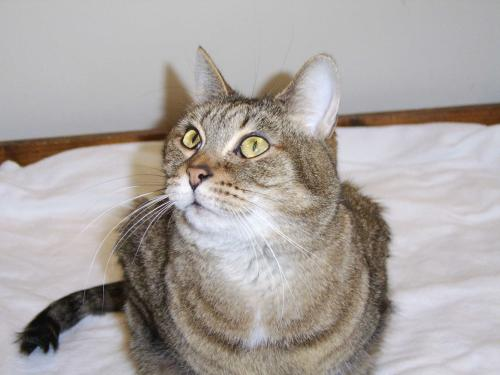

In [4]:
from IPython.display import Image

Image(filename="images/cat.jpg", width=300, height=200)

In [6]:
preprocess_image= prepare_images("D:\Projects\WorkSpace\Deep Learning\mobilenet\images\cat.jpg")
prediction= mobile.predict(preprocess_image)
result= imagenet_utils.decode_predictions(prediction)
result

1/1 [==============================] - 1s 1s/step


[[('n02123045', 'tabby', 0.44886807),
  ('n02123159', 'tiger_cat', 0.43339106),
  ('n02124075', 'Egyptian_cat', 0.10199503),
  ('n02127052', 'lynx', 0.009701914),
  ('n03482405', 'hamper', 0.0010947438)]]

In [8]:
assert result[0][0][1] == 'tabby'

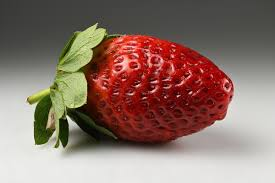

In [9]:
Image(filename='images/strawberry.jpg', width=300, height=200)

In [11]:
preprocess_image = prepare_images("D:\Projects\WorkSpace\Deep Learning\mobilenet\images\strawberry.jpg")
prediction = mobile.predict(preprocess_image)
result= imagenet_utils.decode_predictions(prediction)
result

1/1 [==============================] - 0s 161ms/step


[[('n07745940', 'strawberry', 0.99849653),
  ('n07760859', 'custard_apple', 0.0011315681),
  ('n04423845', 'thimble', 0.000100409976),
  ('n03530642', 'honeycomb', 5.178313e-05),
  ('n12267677', 'acorn', 3.621187e-05)]]

In [12]:
assert result[0][0][1] == 'strawberry'

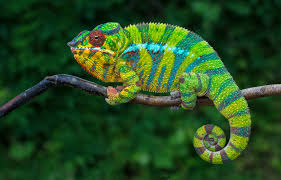

In [13]:
Image(filename='images/cameleon.jpg', width=300, height=200)

In [14]:
preprocess_image = prepare_images("D:\Projects\WorkSpace\Deep Learning\mobilenet\images\cameleon.jpg")
prediction = mobile.predict(preprocess_image)
result= imagenet_utils.decode_predictions(prediction)
result

1/1 [==============================] - 0s 86ms/step


[[('n01694178', 'African_chameleon', 0.9993117),
  ('n01675722', 'banded_gecko', 0.00023610465),
  ('n01820546', 'lorikeet', 0.000106650215),
  ('n02177972', 'weevil', 6.376227e-05),
  ('n03532672', 'hook', 2.7080001e-05)]]

In [15]:
mobile.save("mobile.h5")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
